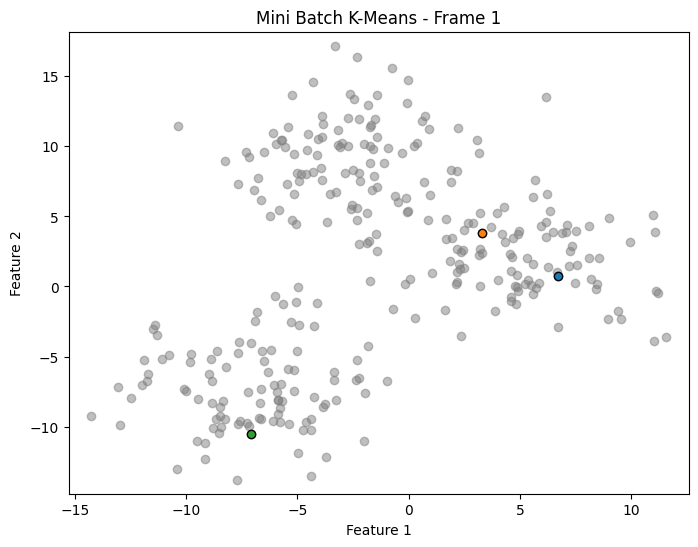

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets import make_blobs
from IPython.display import HTML

# Function to calculate the Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# Mini Batch K-Means algorithm
def mini_batch_kmeans(X, k, b, t):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    # Track centroids over time for visualization
    centroids_history = [centroids.copy()]
    # Update counts for each centroid
    v = np.zeros(k)

    # Run the algorithm for t iterations
    for i in range(t):
        # Randomly select a mini-batch
        M = X[np.random.choice(X.shape[0], b, replace=False)]
        # Update centroids with mini-batch
        for x in M:
            # Find the nearest centroid
            distances = euclidean_distance(x, centroids)
            nearest_centroid_index = np.argmin(distances)
            v[nearest_centroid_index] += 1
            eta = 1 / v[nearest_centroid_index]
            centroids[nearest_centroid_index] = (1 - eta) * centroids[nearest_centroid_index] + eta * x
            centroids_history.append(centroids.copy())

    return centroids, centroids_history

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42, cluster_std=3.0)

# Parameters for Mini Batch K-Means
k = 3  # Number of clusters
b = 10  # Batch size
t = 20  # Number of iterations

# Run Mini Batch K-Means
final_centroids, centroids_history = mini_batch_kmeans(X, k, b, t)

# Animation function
def animate(i):
    plt.cla()
    plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
    for j, c in enumerate(centroids_history[i]):
        plt.scatter(*c, color=f'C{j}', edgecolor='black')

    plt.title(f'Mini Batch K-Means - Frame {i+1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(np.min(X[:,0]) - 1, np.max(X[:,0]) + 1)
    plt.ylim(np.min(X[:,1]) - 1, np.max(X[:,1]) + 1)

# Create animation
fig = plt.figure(figsize=(8, 6))
ani = animation.FuncAnimation(fig, animate, frames=len(centroids_history), interval=100, repeat=False)

# Display the animation
HTML(ani.to_html5_video())


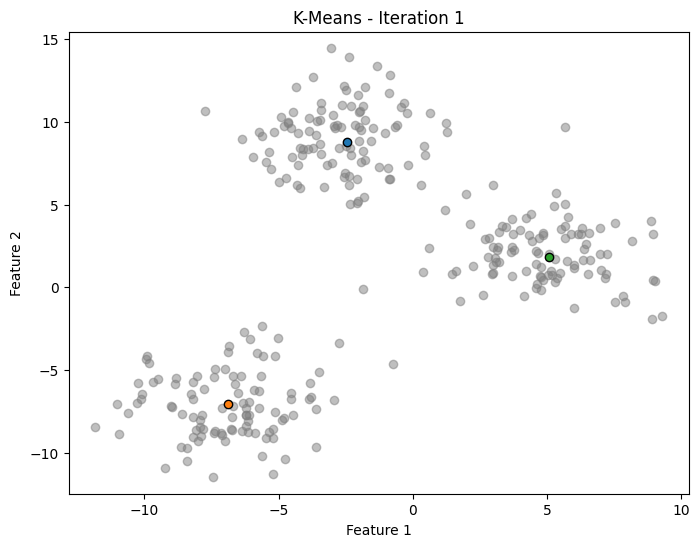

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from IPython.display import HTML

# Generate synthetic data with increased variance
X, _ = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=2.0, random_state=42)

# Parameters for K-Means
k = 3  # Number of clusters
t = 20  # Number of iterations

# Initialize KMeans
kmeans = KMeans(n_clusters=k, max_iter=1, init='random', n_init=1, random_state=42)

# Store centroids history for animation
centroids_history = []

# Run KMeans iteratively to capture centroids movement
for i in range(t):
    kmeans.max_iter += 1  # Increment the number of max iterations
    kmeans.fit(X)
    centroids_history.append(kmeans.cluster_centers_.copy())

# Animation function
def animate(i):
    plt.cla()
    plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
    for j, c in enumerate(centroids_history[i]):
        plt.scatter(*c, color=f'C{j}', edgecolor='black')

    plt.title(f'K-Means - Iteration {i+1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(np.min(X[:,0]) - 1, np.max(X[:,0]) + 1)
    plt.ylim(np.min(X[:,1]) - 1, np.max(X[:,1]) + 1)

# Create animation
fig = plt.figure(figsize=(8, 6))
ani = animation.FuncAnimation(fig, animate, frames=len(centroids_history), interval=500, repeat=False)

# Display the animation
HTML(ani.to_html5_video())


100/100

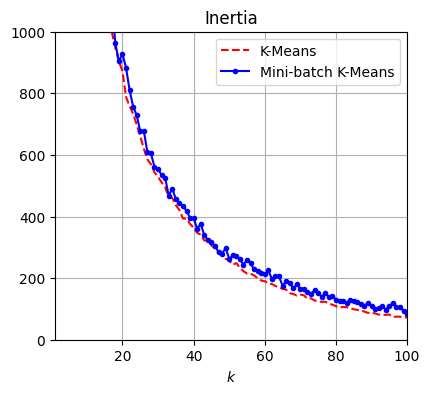

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans

# extra code – this cell generates and saves Figure 9–6

from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, 0, 1000])
plt.grid()

plt.show()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
image = matplotlib.image.imread('/content/fruits.jpg')

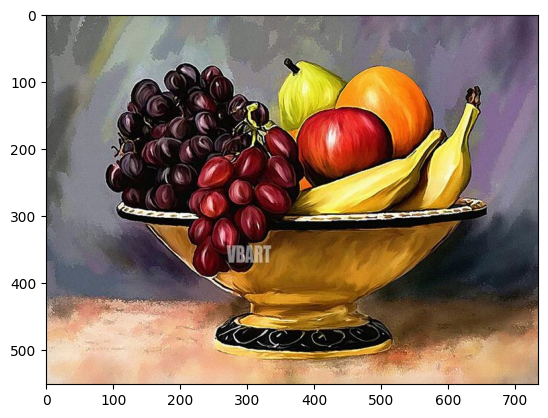

In [ ]:
plt.imshow(image)

In [ ]:
image.shape

(552, 735, 3)

In [ ]:
X = image.reshape(-1,3)
X.shape

(405720, 3)

In [ ]:
X

array([[ 98, 100,  97],
       [ 91,  93,  90],
       [ 87,  89,  86],
       ...,
       [197, 171, 148],
       [207, 181, 158],
       [208, 182, 159]], dtype=uint8)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

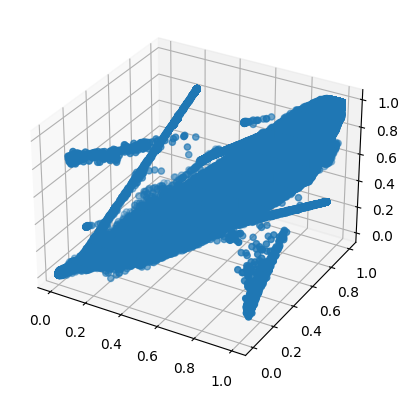

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
kmeans.cluster_centers_

array([[ 55.06781071,  30.72399923,  23.25321861],
       [133.43677325, 111.43345403, 102.06814092],
       [227.69583509, 189.50895036, 129.92618847]])

In [ ]:
from PIL import Image, ImageDraw
import numpy as np

def create_color_palette(dominant_colors, palette_size=(300, 50)):
    # Create an image to display the colors
    palette = Image.new("RGB", palette_size)
    draw = ImageDraw.Draw(palette)

    # Calculate the width of each color swatch
    swatch_width = palette_size[0] // len(dominant_colors)

    # Draw each color as a rectangle on the palette
    for i, color in enumerate(dominant_colors):
        draw.rectangle([i * swatch_width, 0, (i + 1) * swatch_width, palette_size[1]], fill=tuple(color))

    return palette

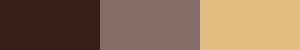

In [ ]:
create_color_palette(kmeans.cluster_centers_.astype(int))